In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, VotingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_excel("Transformed_data/transformed_data_5.xlsx")

In [4]:
X=data.drop('SeriousDlqin2yrs',axis=1).values
y=data['SeriousDlqin2yrs'].values
#y=y.reshape(-1,1)
print(X.shape)
print(y.shape)

(150000, 51)
(150000,)


{'reg__C': 100000.0}
0.735028671861
             precision    recall  f1-score   support

          0       0.95      0.98      0.96     42015
          1       0.46      0.21      0.28      2985

avg / total       0.91      0.93      0.92     45000

[[41284   731]
 [ 2373   612]]


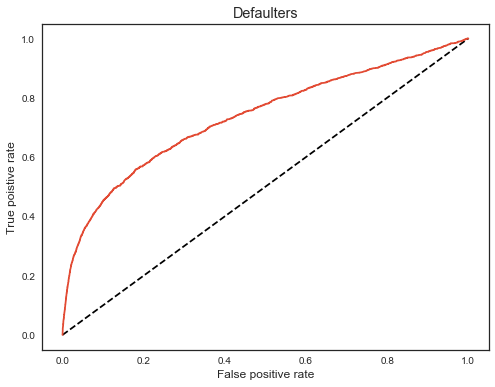

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
steps = [('reg',LogisticRegression(penalty='l1', random_state=777, max_iter=10000, tol=10))]
pipeline = Pipeline(steps)
parameters = {'reg__C': np.power(10.0, np.arange(-10, 10))}
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
cv= GridSearchCV(pipeline,param_grid=parameters,scoring='roc_auc', cv=5)
cv.fit(X_train,y_train)
y_pred= cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
y_pred_prob=cv.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [6]:
#for LOG reg with l1 regulrization
from sklearn.metrics import roc_auc_score
y_pred_prob = cv.predict_proba(X_test)[:,1]
logr1=roc_auc_score(y_test,y_pred_prob)
print(logr1)

0.735028671861


{'reg__C': 1.0}
0.859001935494
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     41992
          1       0.57      0.20      0.30      3008

avg / total       0.92      0.94      0.92     45000

[[41546   446]
 [ 2407   601]]


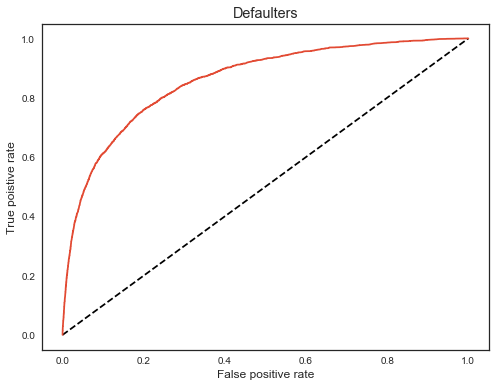

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

steps = [('reg',LogisticRegression(penalty='l2', random_state=777, max_iter=100000))]
pipeline = Pipeline(steps)
parameters = {'reg__C': np.power(10.0, np.arange(-10, 10))}
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)
cv= GridSearchCV(pipeline,param_grid=parameters,scoring='roc_auc', cv=7)
cv.fit(X_train,y_train)
y_pred= cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#y_pred_prob= pipeline.named_steps['reg'].predict_proba(X_test)[:,1]
y_pred_prob=cv.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [8]:
#for LOG reg with l2 regularization
from sklearn.metrics import roc_auc_score
y_pred_prob = cv.predict_proba(X_test)[:,1]
logr2=roc_auc_score(y_test,y_pred_prob)
print(logr2)

0.859001935494


In [9]:
for i in range(10):
    print(cv.predict_proba(X_test)[0,:])

[ 0.91107195  0.08892805]
[ 0.91107195  0.08892805]
[ 0.91107195  0.08892805]
[ 0.91107195  0.08892805]
[ 0.91107195  0.08892805]
[ 0.91107195  0.08892805]
[ 0.91107195  0.08892805]
[ 0.91107195  0.08892805]
[ 0.91107195  0.08892805]
[ 0.91107195  0.08892805]


In [10]:
from sklearn.grid_search import GridSearchCV
 
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [3,4,5,6],
           "max_depth" : [5, 10, 15, 20],
           "min_samples_leaf" : [1000,2000,3000]}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_depth': 5, 'min_samples_leaf': 1000, 'n_estimators': 3}


{'max_depth': 5, 'min_samples_leaf': 1000, 'n_estimators': 3}
0.933155555556
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     41992
          1       0.00      0.00      0.00      3008

avg / total       0.87      0.93      0.90     45000

[[41992     0]
 [ 3008     0]]


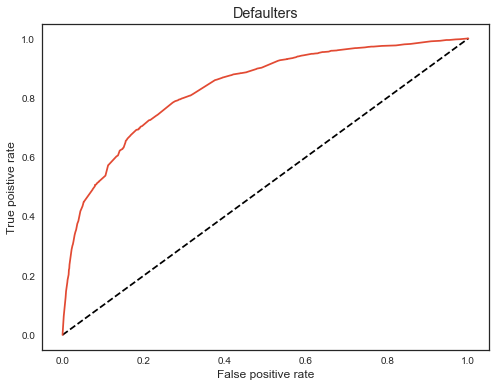

In [11]:
 y_pred= CV_rfc.predict(X_test)
print(CV_rfc.best_params_)
print(CV_rfc.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#y_pred_prob= pipeline.named_steps['reg'].predict_proba(X_test)[:,1]
y_pred_prob=CV_rfc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForest')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [12]:
#for RandomForest
from sklearn.metrics import roc_auc_score
y_pred_prob = CV_rfc.predict_proba(X_test)[:,1]
rf=roc_auc_score(y_test,y_pred_prob)
print(rf)

0.832910889752


0.906244444444
             precision    recall  f1-score   support

          0       0.96      0.93      0.95     42015
          1       0.35      0.51      0.42      2985

avg / total       0.92      0.91      0.91     45000

[[39272  2743]
 [ 1476  1509]]


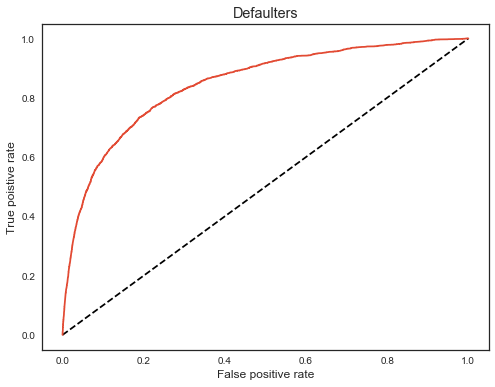

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

clf = BernoulliNB()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BernoulliNB')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [14]:
#for BernoulliNB with binarizer
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
bnb=roc_auc_score(y_test,y_pred_prob)
print(bnb)

0.846357189574


0.894955555556
             precision    recall  f1-score   support

          0       0.97      0.92      0.94     42015
          1       0.32      0.54      0.41      2985

avg / total       0.92      0.89      0.91     45000

[[38658  3357]
 [ 1370  1615]]


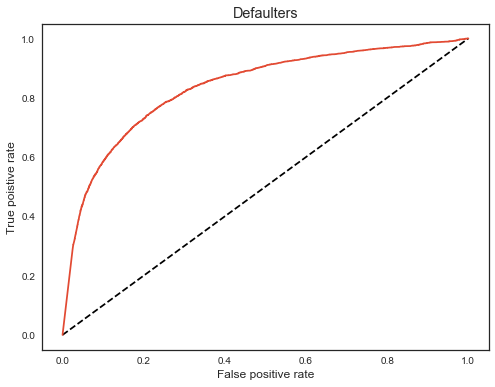

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

clf = GaussianNB()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [16]:
#for gaussianNB
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
gnb=roc_auc_score(y_test,y_pred_prob)
print(gnb)

0.836435635275


0.9294
             precision    recall  f1-score   support

          0       0.96      0.97      0.96     42015
          1       0.46      0.38      0.42      2985

avg / total       0.92      0.93      0.93     45000

[[40682  1333]
 [ 1844  1141]]


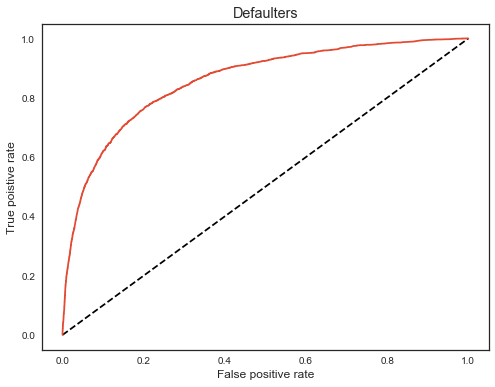

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
#from sklearn.neural_network import MLPClassifier
#clf = QuadraticDiscriminantAnalysis()
clf = LinearDiscriminantAnalysis()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear DA')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [18]:
#for LDA
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
lda=roc_auc_score(y_test,y_pred_prob)
print(lda)

0.857937770889


0.899311111111
             precision    recall  f1-score   support

          0       0.97      0.93      0.94     42015
          1       0.34      0.54      0.41      2985

avg / total       0.92      0.90      0.91     45000

[[38872  3143]
 [ 1388  1597]]


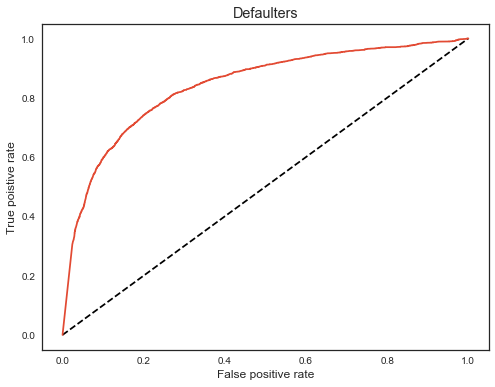

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
clf = QuadraticDiscriminantAnalysis()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Quadratic DA')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [20]:
#for QDA
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
qda=roc_auc_score(y_test,y_pred_prob)
print(qda)

0.840554185103


0.935866666667
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     42015
          1       0.55      0.18      0.27      2985

avg / total       0.92      0.94      0.92     45000

[[41568   447]
 [ 2439   546]]


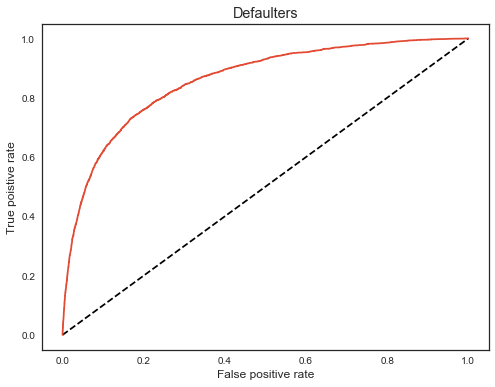

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(11,4),random_state=1,activation='relu')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='MLP')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [22]:
#for MLP
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
mlp=roc_auc_score(y_test,y_pred_prob)
print(mlp)

0.858912863337


In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))

0.932177777778
             precision    recall  f1-score   support

          0       0.94      0.99      0.96     42015
          1       0.46      0.12      0.19      2985

avg / total       0.91      0.93      0.91     45000

[[41597   418]
 [ 2634   351]]


In [24]:
#for KNN
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
knn=roc_auc_score(y_test,y_pred_prob)
print(knn)

0.692586674895


0.923911111111
             precision    recall  f1-score   support

          0       0.96      0.96      0.96     42015
          1       0.43      0.43      0.43      2985

avg / total       0.92      0.92      0.92     45000

[[40299  1716]
 [ 1708  1277]]


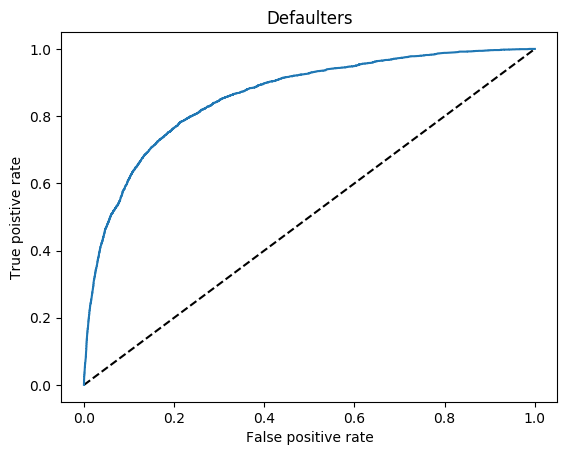

In [28]:
#Ensemble
clf1=GaussianNB()
#clf2=BernoulliNB()
clf3=LinearDiscriminantAnalysis()
#clf5=QuadraticDiscriminantAnalysis()
clf4=LogisticRegression(penalty='l2', random_state=777, max_iter=100000)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
eclf1 = VotingClassifier(estimators=[('gnb', clf1), ('lda', clf3),('lr',clf4),], voting='soft')
eclf1 = eclf1.fit(X_train, y_train)
predicted= eclf1.predict(X_test)
print(eclf1.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=eclf1.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BernoulliNB')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score
y_pred_prob = eclf1.predict_proba(X_test)[:,1]
ens=roc_auc_score(y_test,y_pred_prob)
print("The AUC of VotingClassifier is: ")
print(ens)

The AUC of VotingClassifier is: 
0.859374874292


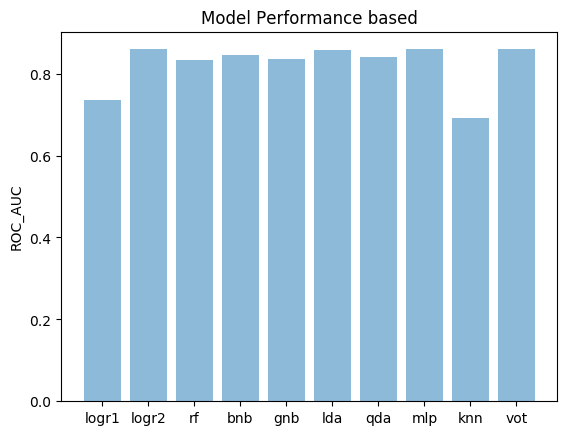

In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('logr1', 'logr2', 'rf', 'bnb', 'gnb', 'lda','qda','mlp','knn','vot')
y_pos = np.arange(len(objects))
performance = [logr1,logr2,rf,bnb,gnb,lda,qda,mlp,knn,ens]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('ROC_AUC')
plt.title('Model Performance based')
 
plt.show()

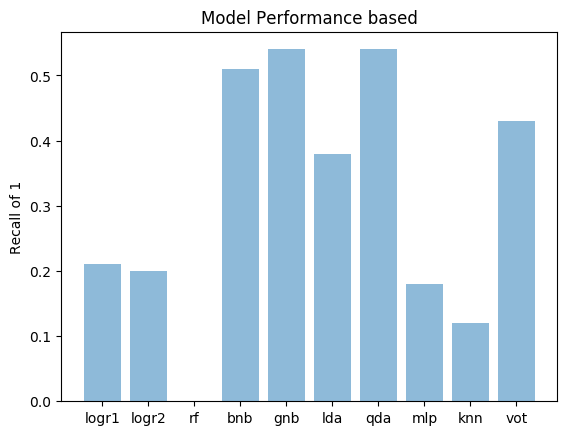

In [31]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('logr1', 'logr2', 'rf', 'bnb', 'gnb', 'lda','qda','mlp','knn','vot')
y_pos = np.arange(len(objects))
performance = [0.21,0.20,0,0.51,0.54,0.38,0.54,0.18,0.12,0.43]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Recall of 1')
plt.title('Model Performance based')
 
plt.show()

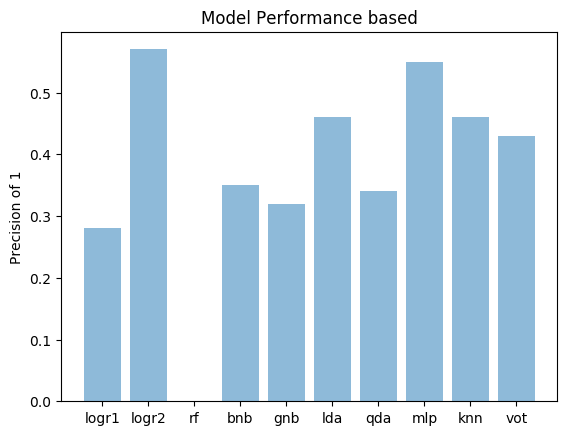

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('logr1', 'logr2', 'rf', 'bnb', 'gnb', 'lda','qda','mlp','knn','vot')
y_pos = np.arange(len(objects))
performance = [0.28,0.57,0,0.35,0.32,0.46,0.34,0.55,0.46,0.43]
#precision is the fraction of relevant instances among the retrieved instances
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Precision of 1')
plt.title('Model Performance based')
 
plt.show()